In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/New folder/imdb_top_1000.csv')


In [6]:
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
df['Gross'] = df['Gross'].replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


In [8]:
df.isnull().sum()


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())


In [19]:
mean_rating = df['IMDB_Rating'].mean()
median_rating = df['IMDB_Rating'].median()
mode_rating = df['IMDB_Rating'].mode()[0]

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")

Mean Rating: 7.949299999999999
Median Rating: 7.9
Mode Rating: 7.7


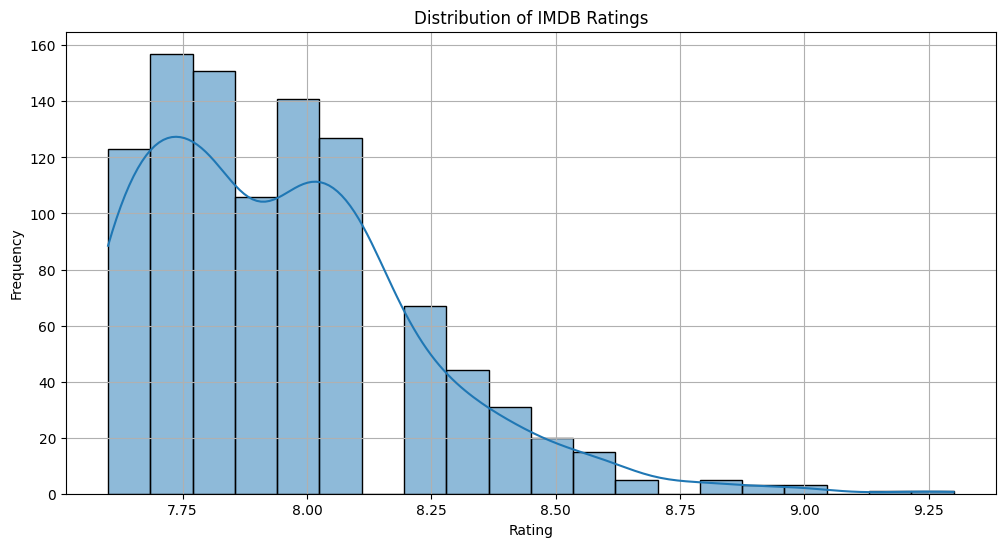

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


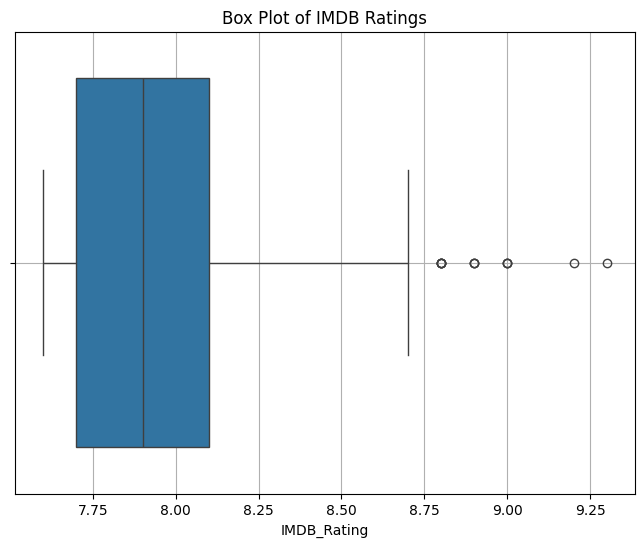

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='IMDB_Rating', data=df)
plt.title('Box Plot of IMDB Ratings')
plt.grid(True)
plt.show()


In [13]:
top_rated_movies = df[df['IMDB_Rating'] >= 9.0].sort_values(by='IMDB_Rating', ascending=False)
top_rated_movies[['Series_Title', 'IMDB_Rating']].head(10)


,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0


In [14]:
df['Genre'] = df['Genre'].str.split(', ')
top_genres = df.explode('Genre')['Genre'].value_counts().head(10)
top_genres


Genre
Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64

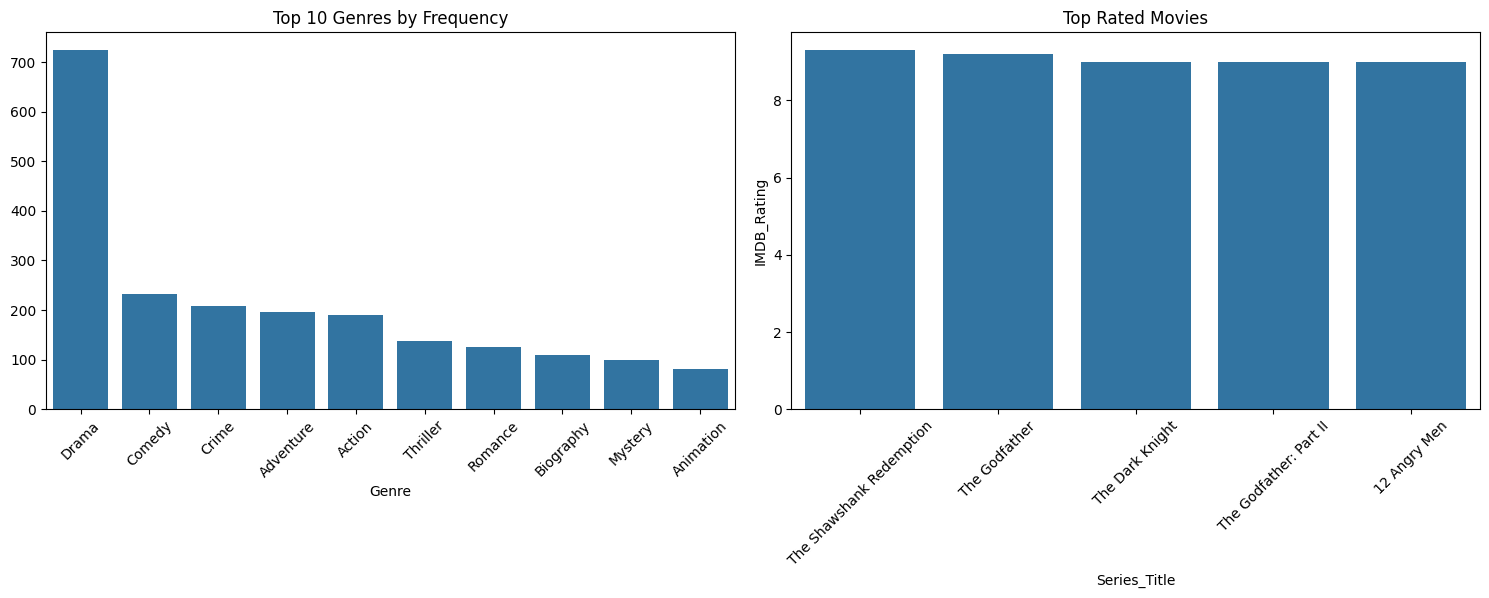

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Genres by Frequency')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.barplot(x=top_rated_movies['Series_Title'], y=top_rated_movies['IMDB_Rating'])
plt.title('Top Rated Movies')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [20]:
df.to_csv('C:/Users/HP/OneDrive/Desktop/New folder/cleaned_imdb_top_1000.csv', index=False)
